In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



In [5]:
# Load the iris dataset
url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=column_names)

print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


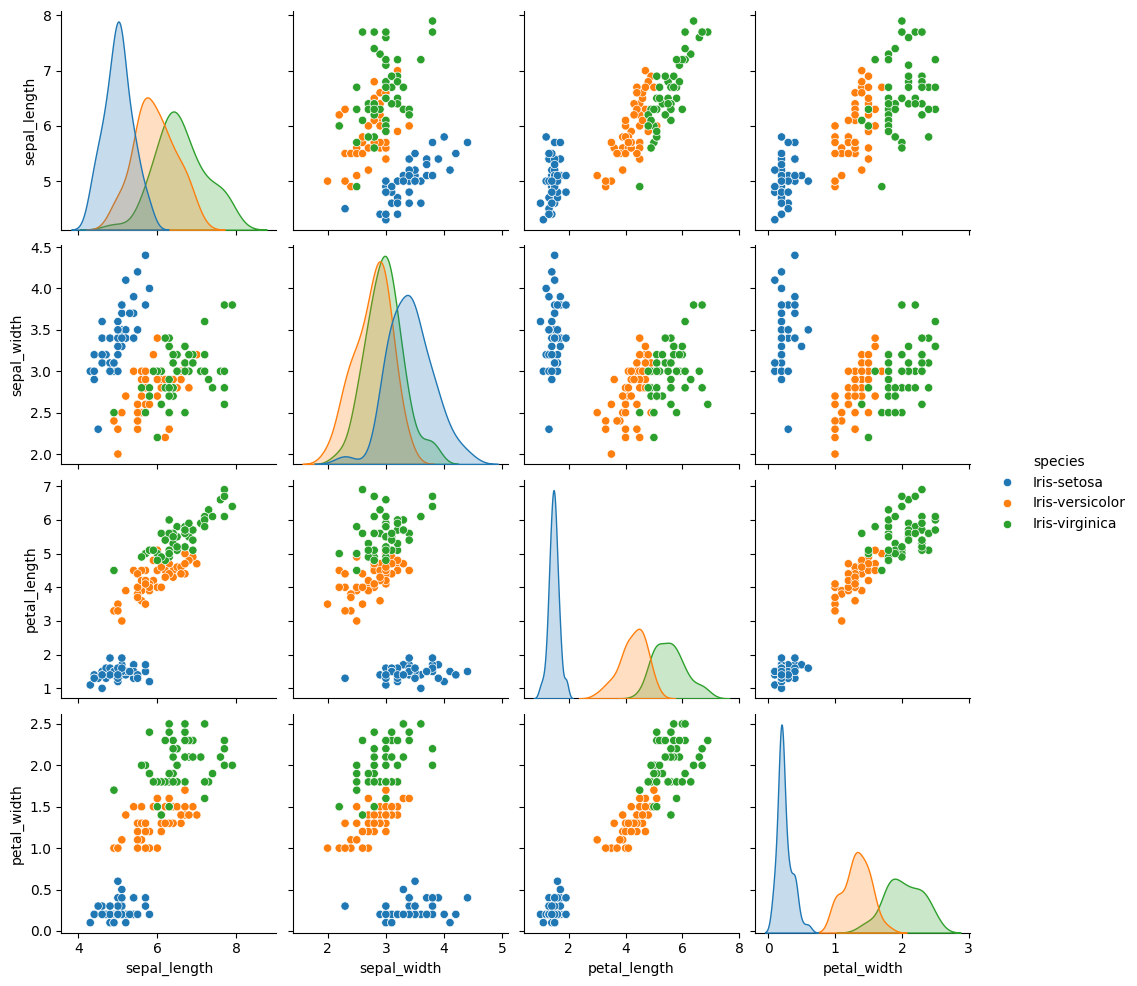

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [6]:
# Visualize the distribution of each feature
sns.pairplot(iris, hue='species')
plt.show()

print(iris.isnull().sum())

In [7]:
# Create binary target (1 for Iris-virginica, else 0) and remove the original species column
iris = iris.assign(target=(iris['species'].eq('Iris-virginica')).astype(int)).drop('species', axis=1)
print(iris.head())


   sepal_length  sepal_width  petal_length  petal_width  target
0           5.1          3.5           1.4          0.2       0
1           4.9          3.0           1.4          0.2       0
2           4.7          3.2           1.3          0.2       0
3           4.6          3.1           1.5          0.2       0
4           5.0          3.6           1.4          0.2       0


In [8]:
# Separate features and target column
feature_cols = [col for col in iris.columns if col != 'target']
X = iris.loc[:, feature_cols]
y = iris.loc[:, 'target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (120, 4)
Testing set shape: (30, 4)


In [9]:
from sklearn.preprocessing import StandardScaler

# Fit on training data, then transform both splits
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled training data (first 5 rows):")
print(X_train_scaled[:5, :])


Scaled training data (first 5 rows):
[[-1.47393679  1.22037928 -1.5639872  -1.30948358]
 [-0.13307079  3.02001693 -1.27728011 -1.04292204]
 [ 1.08589829  0.09560575  0.38562104  0.28988568]
 [-1.23014297  0.77046987 -1.21993869 -1.30948358]
 [-1.7177306   0.32056046 -1.39196294 -1.30948358]]


In [10]:
from sklearn.linear_model import LogisticRegression as LR

model = LR().fit(X_train_scaled, y_train)

# Display learned parameters
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")


Coefficients: [[ 0.17705268 -0.65559404  2.32182293  2.85727663]]
Intercept: [-3.70951767]


In [11]:
from sklearn import metrics

y_pred = model.predict(X_test_scaled)

acc = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
report = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 1.0000
Confusion Matrix:
 [[19  0]
 [ 0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



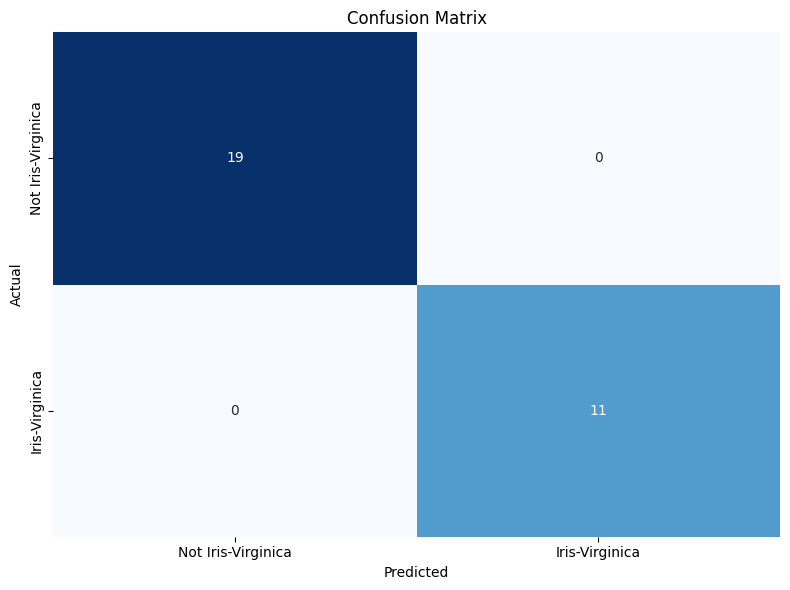

In [12]:
labels = ['Not Iris-Virginica', 'Iris-Virginica']
cm_df = pd.DataFrame(
    conf_matrix,
    index=pd.Index(labels, name='Actual'),
    columns=pd.Index(labels, name='Predicted')
)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
ax.set_title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [13]:
!pip install ucimlrepo

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.3/163.3 kB 626.7 kB/s eta 0:00:00a 0:00:01


In [15]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
banknote_authentication = fetch_ucirepo(id=267) 

X = banknote_authentication.data.features 
y = banknote_authentication.data.targets 

print(banknote_authentication.metadata) 


print(banknote_authentication.variables) 

print(X.head())
print(y.head())

{'uci_id': 267, 'name': 'Banknote Authentication', 'repository_url': 'https://archive.ics.uci.edu/dataset/267/banknote+authentication', 'data_url': 'https://archive.ics.uci.edu/static/public/267/data.csv', 'abstract': 'Data were extracted from images that were taken for the evaluation of an authentication procedure for banknotes.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1372, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Fri Feb 16 2024', 'dataset_doi': '10.24432/C55P57', 'creators': ['Volker Lohweg'], 'intro_paper': None, 'additional_info': {'summary': 'Data were extracted from images that were taken from genuine and forged banknote-like specimens.  For digitization, an industrial camera usually used for print inspection was used. The final im

Accuracy: 0.9709090909090909
Precision: 0.9384615384615385
Recall: 1.0
F1-Score: 0.9682539682539683
ROC-AUC: 0.9999464266580949
Confusion Matrix:
 [[145   8]
 [  0 122]]


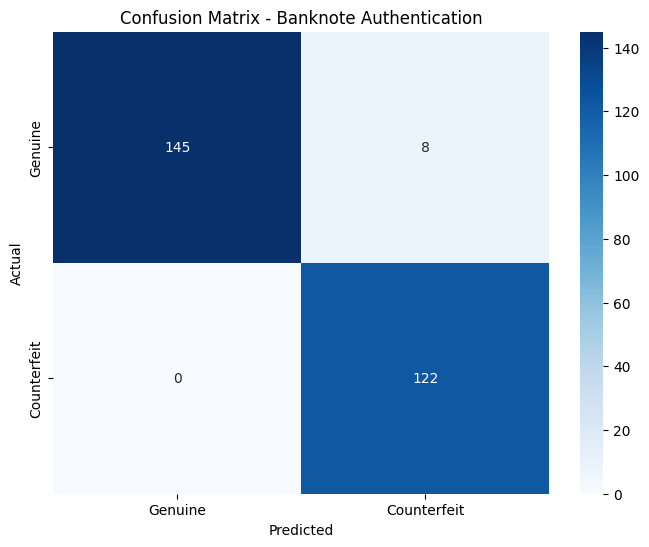

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train.values.ravel())

# Make predictions
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC-AUC: {roc_auc}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
             xticklabels=['Genuine', 'Counterfeit'],
             yticklabels=['Genuine', 'Counterfeit'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Banknote Authentication')
plt.show()

In [20]:
# Train with two different regularization strengths and show coefficients
def fit_logreg(C_value, label):
    clf = LogisticRegression(C=C_value, random_state=42)  # L2 is default
    clf.fit(X_train_scaled, y_train.squeeze())
    print(f"{label} (C={C_value}) coefficients:", clf.coef_)
    return clf

model_high_reg = fit_logreg(0.01, "High regularization")
model_low_reg  = fit_logreg(100,  "Low regularization")

High regularization (C=0.01) coefficients: [[-1.22601551 -0.78691657 -0.45819242  0.0324489 ]]
Low regularization (C=100) coefficients: [[-13.52790797 -15.7969897  -14.33050266  -0.6442322 ]]


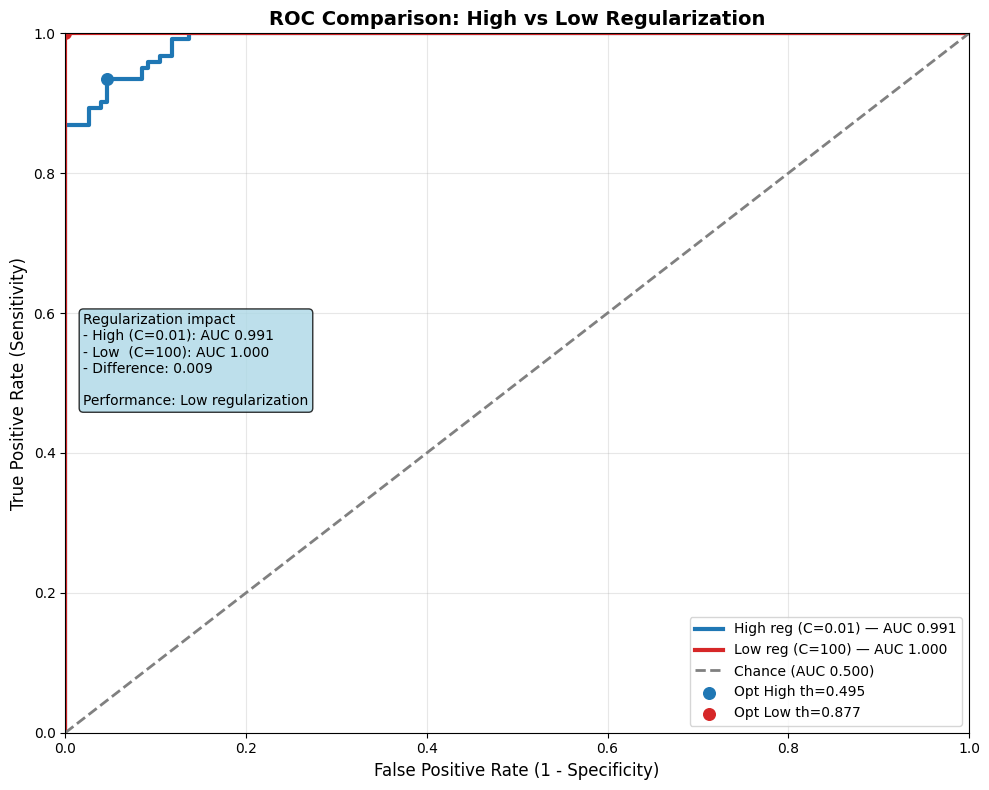

In [24]:
# ROC curve comparison (reworked)
from sklearn.metrics import roc_curve, auc

def _compute_roc(model, X, y_true):
    prob = model.predict_proba(X)[:, 1]
    fpr, tpr, thr = roc_curve(y_true, prob)
    return fpr, tpr, thr, auc(fpr, tpr)

y_true = y_test.values.ravel()

fpr_hi, tpr_hi, thr_hi, auc_hi = _compute_roc(model_high_reg, X_test_scaled, y_true)
fpr_lo, tpr_lo, thr_lo, auc_lo = _compute_roc(model_low_reg,  X_test_scaled, y_true)

idx_hi = int(np.argmax(tpr_hi - fpr_hi))
idx_lo = int(np.argmax(tpr_lo - fpr_lo))

fig, ax_ = plt.subplots(figsize=(10, 8))
ax_.plot(fpr_hi, tpr_hi, lw=3, color='tab:blue', label=f'High reg (C=0.01) — AUC {auc_hi:.3f}')
ax_.plot(fpr_lo, tpr_lo, lw=3, color='tab:red',  label=f'Low reg (C=100) — AUC {auc_lo:.3f}')
ax_.plot([0, 1], [0, 1], '--', color='gray', lw=2, label='Chance (AUC 0.500)')

ax_.scatter(fpr_hi[idx_hi], tpr_hi[idx_hi], color='tab:blue', s=70,
            label=f'Opt High th={thr_hi[idx_hi]:.3f}')
ax_.scatter(fpr_lo[idx_lo], tpr_lo[idx_lo], color='tab:red', s=70,
            label=f'Opt Low th={thr_lo[idx_lo]:.3f}')

ax_.set_xlim(0.0, 1.0)
ax_.set_ylim(0.0, 1.0)
ax_.set_xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
ax_.set_ylabel('True Positive Rate (Sensitivity)', fontsize=12)
ax_.set_title('ROC Comparison: High vs Low Regularization', fontsize=14, fontweight='bold')
ax_.grid(alpha=0.3)
ax_.legend(loc='lower right', fontsize=10)

diff = abs(auc_hi - auc_lo)
winner = 'High regularization' if auc_hi > auc_lo else ('Low regularization' if auc_lo > auc_hi else 'Similar performance')
summary = (
    f'Regularization impact\n'
    f'- High (C=0.01): AUC {auc_hi:.3f}\n'
    f'- Low  (C=100): AUC {auc_lo:.3f}\n'
    f'- Difference: {diff:.3f}\n\n'
    f'Performance: {winner}'
)

props = dict(boxstyle='round', facecolor='lightblue', alpha=0.8)
ax_.text(0.02, 0.6, summary, fontsize=10, va='top', transform=ax_.transAxes, bbox=props)

plt.tight_layout()
plt.show()


Regularization Impact Analysis

High Regularization (C=0.01):
  - AUC Score: 0.9905
  - Optimal Threshold: 0.4955
  - TPR at Optimal: 0.9344
  - FPR at Optimal: 0.0458

Low Regularization (C=100):
  - AUC Score: 1.0000
  - Optimal Threshold: 0.8769
  - TPR at Optimal: 1.0000
  - FPR at Optimal: 0.0000

Comparison Summary:
  - AUC Difference: 0.0095
  - Low regularization performs better by 0.0095

Interpretation:
  - Minimal difference between regularization levels
  - Dataset may be easy to classify regardless of regularization

In [25]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Search space (same values for C, expressed differently)
param_space = {
    'solver': ['liblinear'],          # supports L1/L2
    'penalty': ['l1', 'l2'],
    'C': list(np.logspace(-2, 2, 5))  # [0.01, 0.1, 1, 10, 100]
}

# Stratified CV for reproducibility
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search
grid = GridSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_grid=param_space,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1
)
grid.fit(X_train_scaled, y_train.values.ravel())

best_model = grid.best_estimator_
print(f"Best params: {grid.best_params_}")
print(f"Best CV ROC-AUC: {grid.best_score_:.4f}")

# Test-set evaluation
y_pred_best = best_model.predict(X_test_scaled)
y_pred_proba_best = best_model.predict_proba(X_test_scaled)[:, 1]

yt = y_test.values.ravel()
acc_best = accuracy_score(yt, y_pred_best)
prec_best = precision_score(yt, y_pred_best)
rec_best = recall_score(yt, y_pred_best)
f1_best = f1_score(yt, y_pred_best)
roc_auc_best = roc_auc_score(yt, y_pred_proba_best)

print("\nBest model performance on test set")
print(f"Accuracy:  {acc_best:.4f}")
print(f"Precision: {prec_best:.4f}")
print(f"Recall:    {rec_best:.4f}")
print(f"F1-Score:  {f1_best:.4f}")
print(f"ROC-AUC:   {roc_auc_best:.4f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Best params: {'C': np.float64(100.0), 'penalty': 'l1', 'solver': 'liblinear'}
Best CV ROC-AUC: 0.9998

Best model performance on test set
Accuracy:  0.9855
Precision: 0.9683
Recall:    1.0000
F1-Score:  0.9839
ROC-AUC:   1.0000


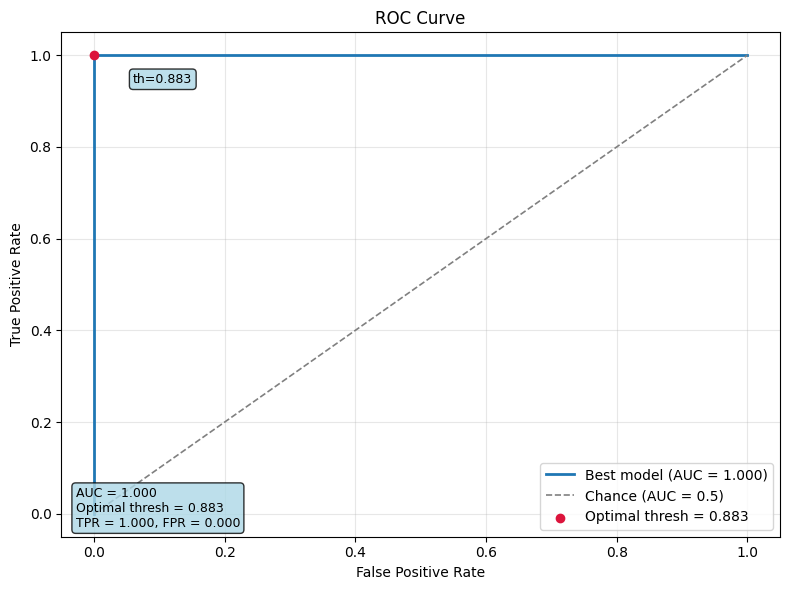

In [ ]:
# ROC for best model with optimal threshold marker (refactored)
fpr_b, tpr_b, thr_b = roc_curve(yt, y_pred_proba_best)
auc_b = auc(fpr_b, tpr_b)

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(fpr_b, tpr_b, lw=2, label=f'Best model (AUC = {auc_b:.3f})')
ax.plot([0, 1], [0, 1], '--', color='gray', lw=1.2, label='Chance (AUC = 0.5)')

youden = tpr_b - fpr_b
j_star = int(np.argmax(youden))
ax.scatter(fpr_b[j_star], tpr_b[j_star], color='crimson', zorder=5,
           label=f'Optimal thresh = {float(thr_b[j_star]):.3f}')
ax.annotate(
    f'th={float(thr_b[j_star]):.3f}',
    xy=(fpr_b[j_star], tpr_b[j_star]),
    xytext=(min(0.95, fpr_b[j_star] + 0.06), max(0.05, tpr_b[j_star] - 0.06)),
    bbox=props,
    fontsize=9
)

info = (
    f'AUC = {auc_b:.3f}\n'
    f'Optimal thresh = {float(thr_b[j_star]):.3f}\n'
    f'TPR = {tpr_b[j_star]:.3f}, FPR = {fpr_b[j_star]:.3f}'
)
ax.text(0.02, 0.02, info, fontsize=9, transform=ax.transAxes, bbox=props)

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
ax.legend(loc='lower right')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()
